## 先引入相關套件，以及所需的運算函式，包括  MinMaxScaler / KMeans ...

In [1]:
# import basic packages
from functools import reduce
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# import sklearn tools
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mutual_info_score
from scipy import stats
%matplotlib inline

# range
rge = 0.5

# define min_max scaler 
mms = MinMaxScaler()

## 讀訓練資料，同時定義好負責的欄位
## 利用 copy() 來 clone 新的 dataframe，方便後續運算、增加欄位

In [2]:
# read training csv
training_data = pd.read_csv("Data/train.csv")

# define middle data
columns = ["cholestoral", "high_sugar", "ecg", "max_rate", "exercise_angina", "st_depression", "heart_disease"]
middle_six = training_data[columns].copy()
middle_six

,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,heart_disease
0,233,1,2,150,0,2.3,0
1,286,0,2,108,1,1.5,1
2,229,0,2,129,1,2.6,1
3,204,0,2,172,0,1.4,0
4,236,0,0,178,0,0.8,0
...,...,...,...,...,...,...,...
223,157,0,0,182,0,0.0,0
224,176,1,2,90,0,1.0,1
225,241,0,0,123,1,0.2,1
226,131,0,0,115,1,1.2,1


## 簡單描述一下該 dataframe，包括中位數、四分位數、最大值....等等
## 此外，也描述一下資料的 shape、各個欄位的資料型態

In [3]:
# briefly describe data
middle_six.describe()

,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,heart_disease
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,248.337719,0.140351,1.026316,148.675439,0.324561,1.010526,0.473684
std,49.388909,0.348115,0.993020,23.969693,0.469241,1.146215,0.500406
min,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,212.750000,0.000000,0.000000,131.000000,0.000000,0.000000,0.000000
50%,244.000000,0.000000,2.000000,152.000000,0.000000,0.800000,0.000000
75%,276.250000,0.000000,2.000000,167.250000,1.000000,1.600000,1.000000
max,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [4]:
# print some overall info
print("shape:", middle_six.shape)
print("dtype:", middle_six.dtypes)
match_status = (middle_six.dtypes == "float64") | (middle_six.dtypes == "int64")
match_dtype = middle_six.dtypes[match_status]
print("matched index:", match_dtype.index)

shape: (228, 7)
dtype: cholestoral          int64
high_sugar           int64
ecg                  int64
max_rate             int64
exercise_angina      int64
st_depression      float64
heart_disease        int64
dtype: object
matched index: Index(['cholestoral', 'high_sugar', 'ecg', 'max_rate', 'exercise_angina',
       'st_depression', 'heart_disease'],
      dtype='object')


## 用 seaborn 套件，對每個變數彼此之間畫出棒狀圖、散步圖...
## 同時也用 dataframe 的 corr() 函式，找到個變數之間的相關係數（用預設的皮爾森係數）。並利用 seaborn 畫出熱區圖

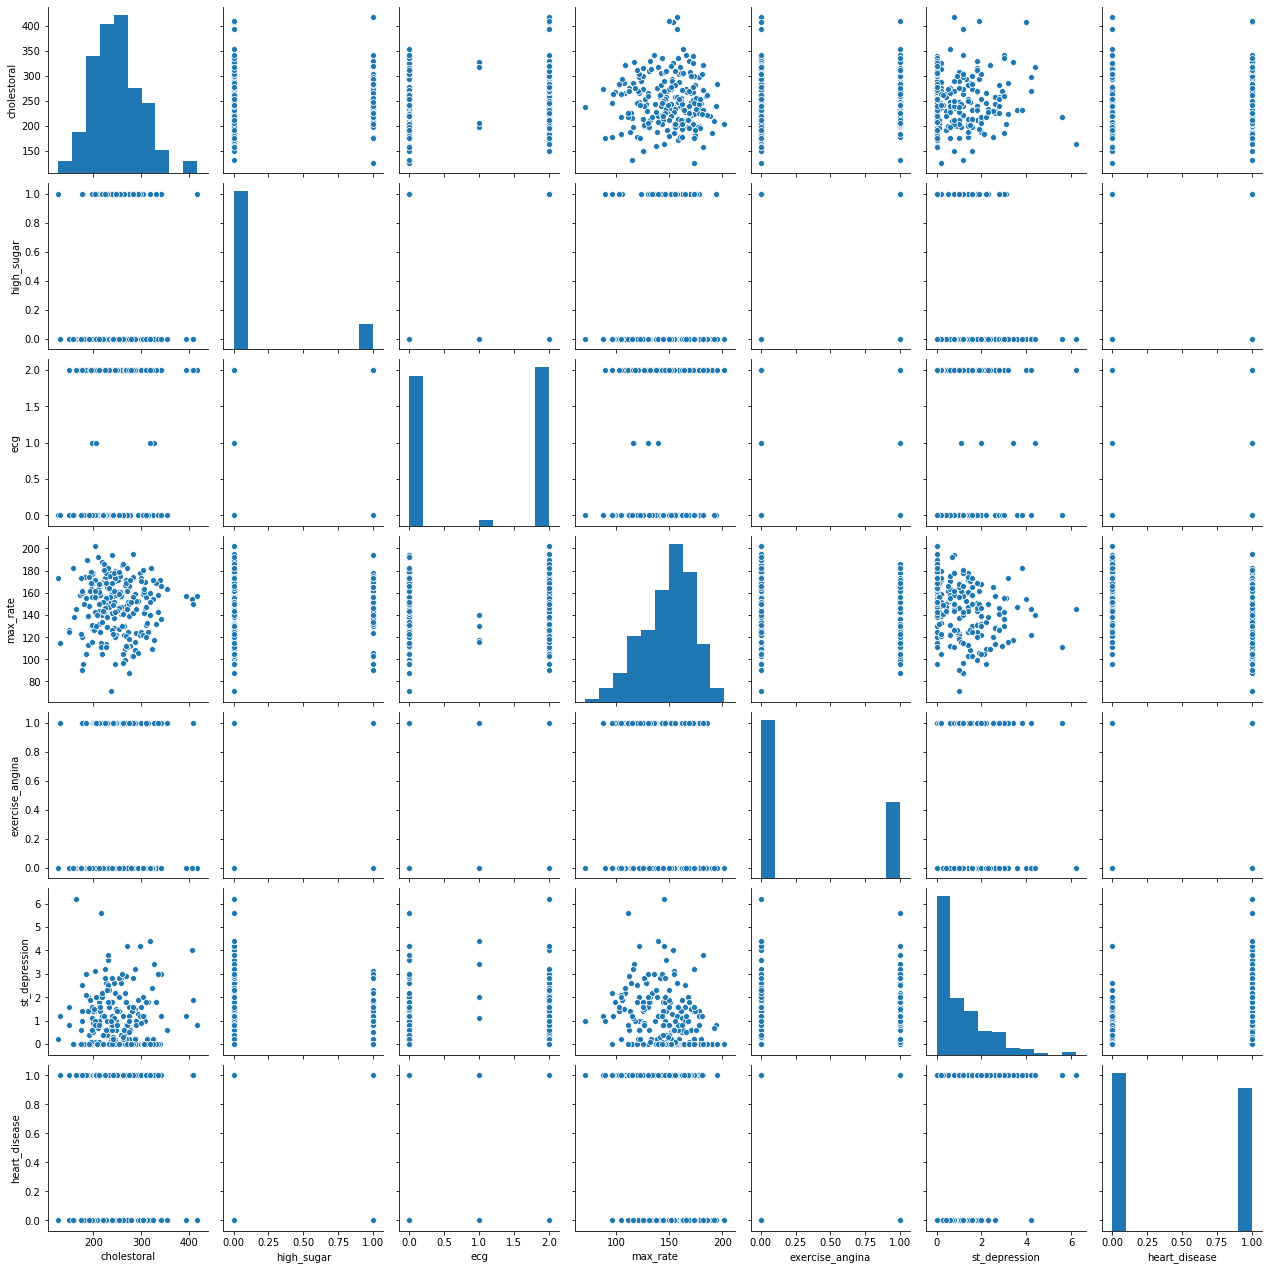

In [5]:
# print all variables' pariplot
sns.pairplot(middle_six.loc[:,match_status])

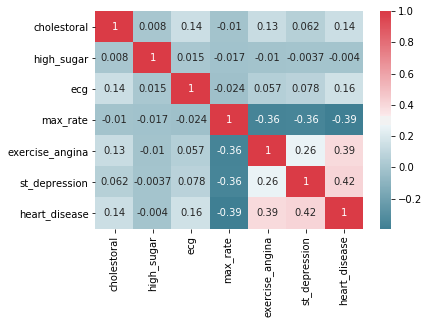

In [6]:
# print correlation and use seaborn to plot heatmap
middle_six_corr = middle_six.loc[:,match_status].corr()
sns.heatmap(middle_six_corr, xticklabels=middle_six_corr.columns, yticklabels=middle_six_corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)

## 處理 cholestoral 變數。
## 首先列出 總和、平均數，也列出四分位數。最後看看有沒有 nan 的資料 

In [7]:
# cholestoral column, and get unique value
cholestoral = middle_six.iloc[:,0]
print(cholestoral, "\n")
print('陣列中的總和--------------->',cholestoral.sum())
print('陣列中的平均值------------->',cholestoral.mean())
print('陣列中最小值--------------->',cholestoral.min())
print('陣列中第一四分位--------------->',cholestoral.quantile([0.25]).values[0])
print('陣列中middle two的平均值--->',cholestoral.median())
print('陣列中第三四分位--------------->',cholestoral.quantile([0.75]).values[0])
print('陣列中最大值--------------->',cholestoral.max())
print('陣列中的個數--------------->',cholestoral.count())
print('nan 個數: {}, 值為: {}'.format(len(cholestoral[cholestoral.isna()]), cholestoral[cholestoral.isna()]))
print('unique value: {}'.format(cholestoral.unique()))

0      233
1      286
2      229
3      204
4      236
      ... 
223    157
224    176
225    241
226    131
227    175
Name: cholestoral, Length: 228, dtype: int64 

陣列中的總和---------------> 56621
陣列中的平均值-------------> 248.33771929824562
陣列中最小值---------------> 126
陣列中第一四分位---------------> 212.75
陣列中middle two的平均值---> 244.0
陣列中第三四分位---------------> 276.25
陣列中最大值---------------> 417
陣列中的個數---------------> 228
nan 個數: 0, 值為: Series([], Name: cholestoral, dtype: int64)
unique value: [233 286 229 204 236 354 254 203 192 294 199 239 275 266 211 224 340 226
 247 335 177 276 243 212 330 230 175 417 198 290 219 253 172 273 213 305
 304 188 282 185 232 231 269 267 248 197 258 245 270 264 321 274 325 257
 216 164 252 255 201 222 260 182 303 265 309 307 186 341 263 407 217 234
 220 209 227 261 250 281 288 240 289 308 318 298 246 322 299 300 214 223
 160 249 394 184 409 244 195 283 196 126 313 259 200 228 193 271 268 210
 277 327 149 306 178 237 208 218 242 319 315 180 311 278 205 225 342 157
 176 

## 先畫出原始的直方圖

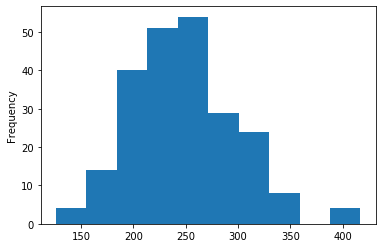

In [8]:
cholestoral.plot.hist()

## 根據上面直方圖，想說可不可以從資料本身的特色及分佈，利用 KMeans 分群，找到適合的點群，並利用該些點群來當成區間參考
## 把各種 k 所算出來的 sum of distance 利用 plot 畫出來

In [9]:
# 根據上面 histogram，試著找到最佳分群來當作 bin 區間
Sum_of_squared_distances = []
Sum_of_squared_thre = 0.5
current_k = 0
current_dst = 0
center = None
cholestoral_val = cholestoral.values
cholestoral_val = cholestoral_val.reshape(-1,1)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cholestoral_val)
    if k == 1 :
        current_dst = km.inertia_
        current_k = k
        center = km.cluster_centers_
    else :
        if np.abs(current_dst - km.inertia_)/current_dst >= Sum_of_squared_thre :
            current_k = k
            center = km.cluster_centers_
        current_dst = km.inertia_
    Sum_of_squared_distances.append(current_dst)

final_center = []
center = center.astype(np.float64)
center = center.reshape(-1)
center = np.sort(center)
center = center.tolist()
final_center.append(cholestoral_val.min())
final_center.extend(center)
final_center.append(cholestoral_val.max())
current_k, final_center, len(final_center)

(2, [126, 216.51094890510944, 296.2527472527472, 417], 4)

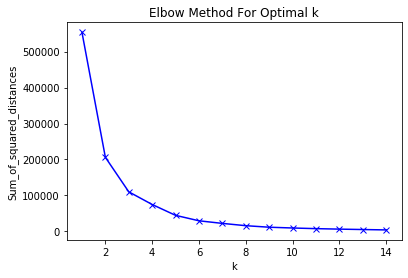

In [10]:
# plot k means result
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## 根據找到的各區間，對應每筆資料的同時，多新增一個欄位來填入這些轉換後的標籤值

In [11]:
# cut bins by k means result
bins = final_center
label_name = [str(i) for i in list(range(len(bins)-1))]
middle_six["cholestoral_label"] = pd.cut(middle_six.cholestoral, bins, labels=label_name, include_lowest=True)
middle_six

,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,heart_disease,cholestoral_label
0,233,1,2,150,0,2.3,0,1
1,286,0,2,108,1,1.5,1,1
2,229,0,2,129,1,2.6,1,1
3,204,0,2,172,0,1.4,0,0
4,236,0,0,178,0,0.8,0,1
...,...,...,...,...,...,...,...,...
223,157,0,0,182,0,0.0,0,0
224,176,1,2,90,0,1.0,1,0
225,241,0,0,123,1,0.2,1,1
226,131,0,0,115,1,1.2,1,0


##  確認新欄位有無 nan 的值，並列出 unique value

In [12]:
cholestoral_label = middle_six["cholestoral_label"]
print('nan 個數: {}, 值為: {}'.format(len(cholestoral_label[cholestoral_label.isna()]), cholestoral_label[cholestoral_label.isna()]))
print('unique value: {}'.format(cholestoral_label.unique()))

nan 個數: 0, 值為: Series([], Name: cholestoral_label, dtype: category
Categories (3, object): [0 < 1 < 2])
unique value: [1, 0, 2]
Categories (3, object): [0 < 1 < 2]


## 把新增的欄位的資料，用直方圖畫出來看看分佈

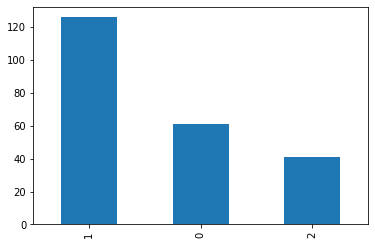

In [13]:
# plot bins from result
cholestoral_label = middle_six["cholestoral_label"].value_counts()
cholestoral_label.plot(kind='bar')

## 利用 seaborn 畫出 boxplot，同時找到離群值
## 而這邊找離群值的方法，純粹是找資料中 0.15 與 0.85 以外（兩旁）的資料
## 同時也能找到非離群值的欄位資料

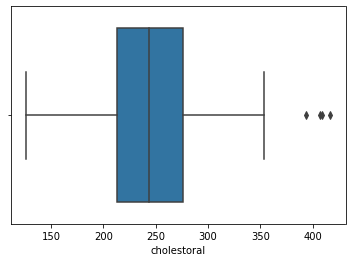

In [14]:
# find outliers and boxplot
sns.boxplot(x=cholestoral)

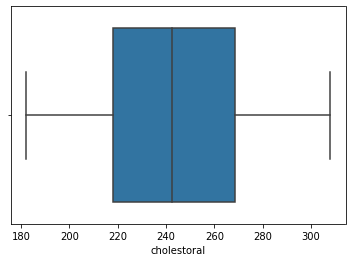

In [15]:
Q1 = cholestoral.quantile(0.25)
Q3 = cholestoral.quantile(0.75)
IQR = Q3 - Q1
cholestoral_min_outlier = (cholestoral < (Q1 - rge * IQR))
cholestoral_max_outlier = (cholestoral > (Q3 + rge * IQR))
outlier = cholestoral_min_outlier | cholestoral_max_outlier
without_outlier = ~outlier
cholestoral_without_outlier = cholestoral[without_outlier] # without outliers
sns.boxplot(x=cholestoral_without_outlier)

## 移除 outliers 後，在利用直方圖來看看分佈跟畫出 boxplot

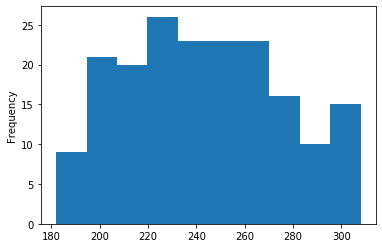

In [16]:
cholestoral_without_outlier.plot.hist()

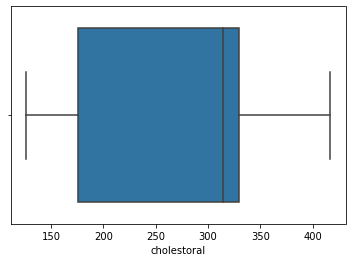

In [17]:
cholestoral_with_outlier = cholestoral[outlier]
sns.boxplot(x=cholestoral_with_outlier)

## 處理 high_sugar 變數。
## 首先列出 總和、平均數，也列出四分位數。最後看看有沒有 nan 的資料 

In [18]:
# high_sugar column
high_sugar = middle_six.iloc[:,1]
print(high_sugar, "\n")
print('陣列中的總和--------------->',high_sugar.sum())
print('陣列中的平均值------------->',high_sugar.mean())
print('陣列中最小值--------------->',high_sugar.min())
print('陣列中第一四分位--------------->',high_sugar.quantile([0.25]).values[0])
print('陣列中middle two的平均值--->',high_sugar.median())
print('陣列中第三四分位--------------->',high_sugar.quantile([0.75]).values[0])
print('陣列中最大值--------------->',high_sugar.max())
print('陣列中的個數--------------->',high_sugar.count())
print('nan 個數: {}, 值為: {}'.format(len(high_sugar[high_sugar.isna()]), high_sugar[high_sugar.isna()]))
print('unique value: {}'.format(high_sugar.unique()))
high_sugar

0      1
1      0
2      0
3      0
4      0
      ..
223    0
224    1
225    0
226    0
227    0
Name: high_sugar, Length: 228, dtype: int64 

陣列中的總和---------------> 32
陣列中的平均值-------------> 0.14035087719298245
陣列中最小值---------------> 0
陣列中第一四分位---------------> 0.0
陣列中middle two的平均值---> 0.0
陣列中第三四分位---------------> 0.0
陣列中最大值---------------> 1
陣列中的個數---------------> 228
nan 個數: 0, 值為: Series([], Name: high_sugar, dtype: int64)
unique value: [1 0]


0      1
1      0
2      0
3      0
4      0
      ..
223    0
224    1
225    0
226    0
227    0
Name: high_sugar, Length: 228, dtype: int64

## 畫出 high sugar 的直方圖（bar chart）

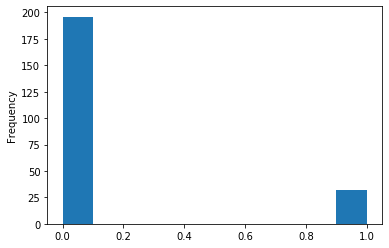

In [19]:
# plot high sugar
high_sugar.plot.hist()

## 利用列聯表，找到 high sugar 跟 heart disease 答案之間的關係
## 接著利用列聯表，試圖找出此 high sugar 的特徵重不重要；與答案有沒有關係
## 方法包括：chi square / mutual information。其中 chi square test 是拿來看特徵有沒有跟答案獨立、關係；mutual information 是看特徵在答案分類中，資訊熵佔大不大

In [20]:
# contigency table between answer
crosstab_high_sugar = pd.crosstab(middle_six.high_sugar, middle_six.heart_disease)
crosstab_high_sugar

heart_disease,0,1
high_sugar,,
0,103,93
1,17,15


## 根據上面直方圖，想說可不可以從資料本身的特色及分佈，利用 KMeans 分群，找到適合的點群，並利用該些點群來當成區間參考
## 把各種 k 所算出來的 sum of distance 利用 plot 畫出來

In [21]:
# get mutal information and chi square's p value
mi_score = mutual_info_score(middle_six.high_sugar.values, middle_six.heart_disease.values, crosstab_high_sugar.values)
chi2_stat, p, dof, ex = stats.chi2_contingency(crosstab_high_sugar.values)

# select significance value
alpha = 0.05

print("===Chi Square Test===\n")
print("===Chi2 Stat===")
print(chi2_stat)
print("\n===Degrees of Freedom===")
print(dof)
print("\n===P-Value===")
print(p)
print("\n===Contingency Table===")
print(ex)

# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('\nVariables are associated (reject H0)')
else:
    print('\nVariables are not associated(fail to reject H0)')

print("\n===Mutual Information's score=== \n{}".format(mi_score))


===Chi Square Test===

===Chi2 Stat===
0.017065263605442114

===Degrees of Freedom===
1

===P-Value===
0.8960647795279932

===Contingency Table===
[[103.15789474  92.84210526]
 [ 16.84210526  15.15789474]]
significance=0.050, p=0.896

Variables are not associated(fail to reject H0)

===Mutual Information's score=== 
7.974368301910673e-06


## 根據上面列聯表，畫出 stack 的直方圖

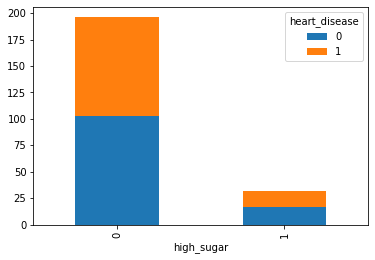

In [22]:
# plot bar chart base on Contingency
crosstab_high_sugar.plot.bar(stacked=True)

## 這部分我們利用 high_sugar 與 heart_disease 群集起來，列出每個值的平均值
## 並利用折線圖來看趨勢走向，了解彼此關係

In [23]:
# 分組的方式印出列中表
high_sugar_groupby = middle_six.groupby(["high_sugar", "heart_disease"]).mean()
# high_sugar_groupby = pd.pivot_table(middle_six, index=["high_sugar", "heart_disease"])
high_sugar_groupby

cholestoral       ecg    max_rate  exercise_angina  \
high_sugar heart_disease                                                       
0          0               241.980583  0.902913  157.747573         0.165049   
           1               255.043011  1.150538  138.967742         0.505376   
1          0               239.117647  0.705882  156.470588         0.058824   
           1               260.866667  1.466667  137.733333         0.600000   

                          st_depression  
high_sugar heart_disease                 
0          0                   0.566990  
           1                   1.505376  
1          0                   0.500000  
           1                   1.566667

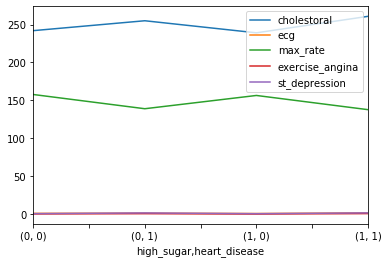

In [24]:
# 畫出折線圖
high_sugar_groupby.plot.line()

## 處理 ecg 變數。
## 首先列出 總和、平均數，也列出四分位數。最後看看有沒有 nan 的資料 

In [25]:
# ecg column
ecg = middle_six.iloc[:,2]
print(ecg, "\n")
print('陣列中的總和--------------->',ecg.sum())
print('陣列中的平均值------------->',ecg.mean())
print('陣列中最小值--------------->',ecg.min())
print('陣列中第一四分位--------------->',ecg.quantile([0.25]).values[0])
print('陣列中middle two的平均值--->',ecg.median())
print('陣列中第三四分位--------------->',ecg.quantile([0.75]).values[0])
print('陣列中最大值--------------->',ecg.max())
print('陣列中的個數--------------->',ecg.count())
print('nan 個數: {}, 值為: {}'.format(len(ecg[ecg.isna()]), ecg[ecg.isna()]))
print('unique value: {}'.format(ecg.unique()))
ecg

0      2
1      2
2      2
3      2
4      0
      ..
223    0
224    2
225    0
226    0
227    0
Name: ecg, Length: 228, dtype: int64 

陣列中的總和---------------> 234
陣列中的平均值-------------> 1.0263157894736843
陣列中最小值---------------> 0
陣列中第一四分位---------------> 0.0
陣列中middle two的平均值---> 2.0
陣列中第三四分位---------------> 2.0
陣列中最大值---------------> 2
陣列中的個數---------------> 228
nan 個數: 0, 值為: Series([], Name: ecg, dtype: int64)
unique value: [2 0 1]


0      2
1      2
2      2
3      2
4      0
      ..
223    0
224    2
225    0
226    0
227    0
Name: ecg, Length: 228, dtype: int64

## 畫出 eco 直方圖

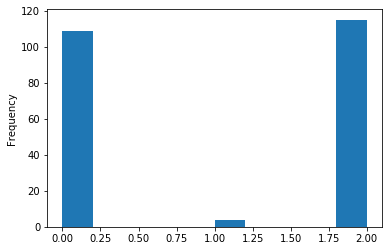

In [26]:
# plot basic histogram
ecg.plot.hist()

## 利用列聯表，找到 ecg 跟 heart disease 答案之間的關係
## 接著利用列聯表，試圖找出此 ecg 的特徵重不重要；與答案有沒有關係
## 方法包括：chi square / mutual information。其中 chi square test 是拿來看特徵有沒有跟答案獨立、關係；mutual information 是看特徵在答案分類中，資訊熵佔大不大

In [27]:
# contigency table
crosstab_ecg = pd.crosstab(middle_six.ecg, middle_six.heart_disease)
crosstab_ecg

heart_disease,0,1
ecg,,
0,67,42
1,1,3
2,52,63


In [28]:
# get mutal information and chi square's p value
mi_score = mutual_info_score(middle_six.ecg.values, middle_six.heart_disease.values, crosstab_ecg.values)
chi2_stat, p, dof, ex = stats.chi2_contingency(crosstab_ecg.values)

# select significance value
alpha = 0.05

print("===Chi Square Test===\n")
print("===Chi2 Stat===")
print(chi2_stat)
print("\n===Degrees of Freedom===")
print(dof)
print("\n===P-Value===")
print(p)
print("\n===Contingency Table===")
print(ex)

# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('\nVariables are associated (reject H0)')
else:
    print('\nVariables are not associated(fail to reject H0)')

print("\n===Mutual Information's score=== \n{}".format(mi_score))

===Chi Square Test===

===Chi2 Stat===
7.17441364180295

===Degrees of Freedom===
2

===P-Value===
0.02767552526225857

===Contingency Table===
[[57.36842105 51.63157895]
 [ 2.10526316  1.89473684]
 [60.52631579 54.47368421]]
significance=0.050, p=0.028

Variables are associated (reject H0)

===Mutual Information's score=== 
0.015907271189134244


## 根據上面列聯表，畫出 stack 的直方圖

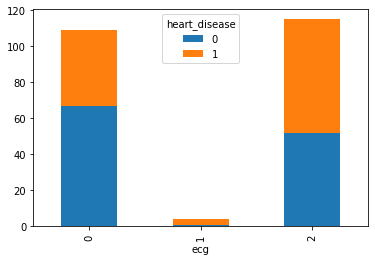

In [29]:
# plot bar chart base on conabstigency table
crosstab_ecg.plot.bar(stacked=True)

## 這部分我們利用 ecg 與 heart_disease 群集起來，列出每個值的平均值
## 並利用折線圖來看趨勢走向，了解彼此關係

In [30]:
# 分組的方式印出列中表
ecg_groupby = middle_six.groupby(["ecg", "heart_disease"]).mean()
# ecg_groupby = pd.pivot_table(middle_six, index=["ecg", "heart_disease"])
ecg_groupby

cholestoral  high_sugar    max_rate  exercise_angina  \
ecg heart_disease                                                         
0   0               237.164179    0.164179  157.522388         0.119403   
    1               246.428571    0.095238  137.214286         0.571429   
1   0               197.000000    0.000000  116.000000         0.000000   
    1               283.333333    0.000000  129.000000         0.666667   
2   0               248.115385    0.115385  158.423077         0.192308   
    1               260.825397    0.174603  140.317460         0.476190   

                   st_depression  
ecg heart_disease                 
0   0                   0.516418  
    1                   1.476190  
1   0                   1.100000  
    1                   3.266667  
2   0                   0.600000  
    1                   1.455556

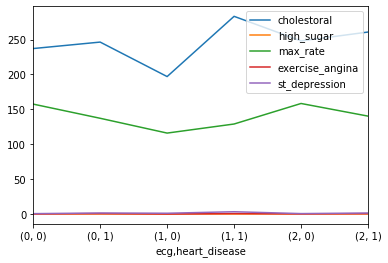

In [31]:
# 畫出折線圖
ecg_groupby.plot.line()

## 處理 max_rate 變數。
## 首先列出 總和、平均數，也列出四分位數。最後看看有沒有 nan 的資料 

In [32]:
# high_sugar column
max_rate = middle_six.iloc[:,3]
print(high_sugar, "\n")
print('陣列中的總和--------------->',max_rate.sum())
print('陣列中的平均值------------->',max_rate.mean())
print('陣列中最小值--------------->',max_rate.min())
print('陣列中第一四分位--------------->',max_rate.quantile([0.25]).values[0])
print('陣列中middle two的平均值--->',max_rate.median())
print('陣列中第三四分位--------------->',max_rate.quantile([0.75]).values[0])
print('陣列中最大值--------------->',max_rate.max())
print('陣列中的個數--------------->',max_rate.count())
print('nan 個數: {}, 值為: {}'.format(len(max_rate[max_rate.isna()]), max_rate[max_rate.isna()]))
print('unique value: {}'.format(max_rate.unique()))

0      1
1      0
2      0
3      0
4      0
      ..
223    0
224    1
225    0
226    0
227    0
Name: high_sugar, Length: 228, dtype: int64 

陣列中的總和---------------> 33898
陣列中的平均值-------------> 148.67543859649123
陣列中最小值---------------> 71
陣列中第一四分位---------------> 131.0
陣列中middle two的平均值---> 152.0
陣列中第三四分位---------------> 167.25
陣列中最大值---------------> 202
陣列中的個數---------------> 228
nan 個數: 0, 值為: Series([], Name: max_rate, dtype: int64)
unique value: [150 108 129 172 178 163 147 155 148 153 162 168 160 139 171 144 173 114
 151 158 120 112 137 157 169 165 123 128 188 109 152 125 142 170 113  99
 177 141 180 111 143 182 156 115 145 146 161 186 185 174 159 130 140 190
 136  97 132 127 154 175 126 202 103 131 124 179 122  96 138  88 105 166
 194 195 106 133 167 192 117 121 116  71 118 181 149 134 164  90]


## 先畫出原始的直方圖

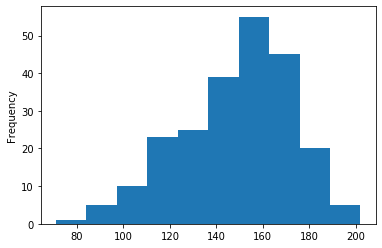

In [33]:
# plot basic histogram
max_rate.plot.hist()

## 利用列聯表，找到 max rate 跟 heart disease 答案之間的關係
## 接著利用列聯表，試圖找出此 high sugar 的特徵重不重要；與答案有沒有關係
## 方法包括：chi square / mutual information。其中 chi square test 是拿來看特徵有沒有跟答案獨立、關係；mutual information 是看特徵在答案分類中，資訊熵佔大不大

In [34]:
# 根據上面 histogram，試著找到最佳分群來當作 bin 區間
Sum_of_squared_distances = []
Sum_of_squared_thre = 0.5
current_k = 0
current_dst = 0
center = None
max_rate_val = max_rate.values
max_rate_val = max_rate_val.reshape(-1,1)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(max_rate_val)
    if k == 1 :
        current_dst = km.inertia_
        current_k = k
        center = km.cluster_centers_
    else :
        if np.abs(current_dst - km.inertia_)/current_dst >= Sum_of_squared_thre :
            current_k = k
            center = km.cluster_centers_
        current_dst = km.inertia_
    Sum_of_squared_distances.append(current_dst)

final_center = []
center = center.astype(np.float64)
center = center.reshape(-1)
center = np.sort(center)
center = center.tolist()
final_center.append(max_rate_val.min())
final_center.extend(center)
final_center.append(max_rate_val.max())
current_k, final_center, len(final_center)

(3, [71, 116.67741935483875, 150.58333333333334, 174.40000000000003, 202], 5)

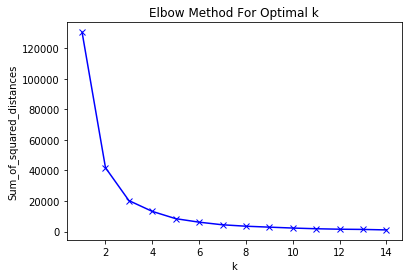

In [35]:
# plot k means result
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## 根據找到的各區間，對應每筆資料的同時，多新增一個欄位來填入這些轉換後的標籤值

In [36]:
# cut bins by k means result
bins = final_center
label_name = [str(i) for i in list(range(len(bins)-1))]
middle_six["max_rate_label"] = pd.cut(middle_six.max_rate, bins, labels=label_name, include_lowest=True)
middle_six

,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,heart_disease,cholestoral_label,max_rate_label
0,233,1,2,150,0,2.3,0,1,1
1,286,0,2,108,1,1.5,1,1,0
2,229,0,2,129,1,2.6,1,1,1
3,204,0,2,172,0,1.4,0,0,2
4,236,0,0,178,0,0.8,0,1,3
...,...,...,...,...,...,...,...,...,...
223,157,0,0,182,0,0.0,0,0,3
224,176,1,2,90,0,1.0,1,0,0
225,241,0,0,123,1,0.2,1,1,1
226,131,0,0,115,1,1.2,1,0,0


##  確認新欄位有無 nan 的值，並列出 unique value

In [37]:
max_rate_label = middle_six["max_rate_label"]
print('nan 個數: {}, 值為: {}'.format(len(max_rate_label[max_rate_label.isna()]), max_rate_label[max_rate_label.isna()]))
print('unique value: {}'.format(max_rate_label.unique()))

nan 個數: 0, 值為: Series([], Name: max_rate_label, dtype: category
Categories (4, object): [0 < 1 < 2 < 3])
unique value: [1, 0, 2, 3]
Categories (4, object): [0 < 1 < 2 < 3]


## 把新增的欄位的資料，用直方圖畫出來看看分佈

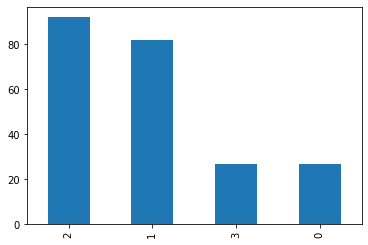

In [38]:
# plot bins from result
max_rate_label = middle_six["max_rate_label"].value_counts()
max_rate_label.plot(kind='bar')

## 利用 seaborn 畫出 boxplot，同時找到離群值
## 而這邊找離群值的方法，純粹是找資料中 0.15 與 0.85 以外（兩旁）的資料
## 同時也能找到非離群值的欄位資料

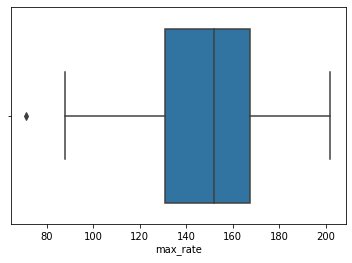

In [39]:
# find outliers and boxplot
sns.boxplot(x=max_rate)

0      150
2      129
3      172
4      178
5      163
      ... 
222    166
223    182
225    123
226    115
227    173
Name: max_rate, Length: 199, dtype: int64

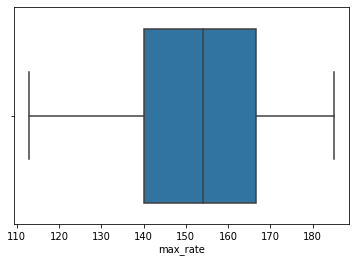

In [40]:
Q1 = max_rate.quantile(0.25)
Q3 = max_rate.quantile(0.75)
IQR = Q3 - Q1
max_rate_min_outlier = (max_rate < (Q1 - rge * IQR))
max_rate_max_outlier = (max_rate > (Q3 + rge * IQR))
outlier = max_rate_min_outlier | max_rate_max_outlier
without_outlier = ~outlier
max_rate_without_outlier = max_rate[without_outlier] # without outliers
sns.boxplot(x=max_rate_without_outlier)
max_rate_without_outlier

## 移除 outliers 後，在利用直方圖來看看分佈跟畫出 boxplot

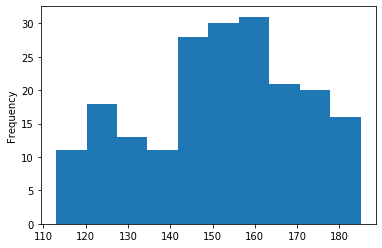

In [41]:
max_rate_without_outlier.plot.hist()

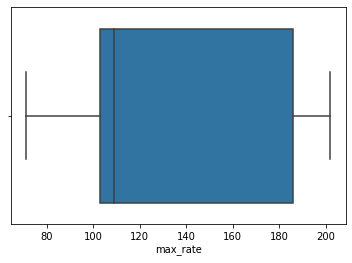

In [42]:
max_rate_with_outlier = max_rate[outlier]
sns.boxplot(x=max_rate_with_outlier)

## 處理 exercise angina 變數。
## 首先列出 總和、平均數，也列出四分位數。最後看看有沒有 nan 的資料 

In [43]:
# exercise_angina column
exercise_angina = middle_six.iloc[:,4]
print(exercise_angina, "\n")
print('陣列中的總和--------------->',exercise_angina.sum())
print('陣列中的平均值------------->',exercise_angina.mean())
print('陣列中最小值--------------->',exercise_angina.min())
print('陣列中第一四分位--------------->',exercise_angina.quantile([0.25]).values[0])
print('陣列中middle two的平均值--->',exercise_angina.median())
print('陣列中第三四分位--------------->',exercise_angina.quantile([0.75]).values[0])
print('陣列中最大值--------------->',exercise_angina.max())
print('陣列中的個數--------------->',exercise_angina.count())
print('nan 個數: {}, 值為: {}'.format(len(exercise_angina[exercise_angina.isna()]), exercise_angina[exercise_angina.isna()]))
print('unique value: {}'.format(exercise_angina.unique()))
exercise_angina

0      0
1      1
2      1
3      0
4      0
      ..
223    0
224    0
225    1
226    1
227    0
Name: exercise_angina, Length: 228, dtype: int64 

陣列中的總和---------------> 74
陣列中的平均值-------------> 0.32456140350877194
陣列中最小值---------------> 0
陣列中第一四分位---------------> 0.0
陣列中middle two的平均值---> 0.0
陣列中第三四分位---------------> 1.0
陣列中最大值---------------> 1
陣列中的個數---------------> 228
nan 個數: 0, 值為: Series([], Name: exercise_angina, dtype: int64)
unique value: [0 1]


0      0
1      1
2      1
3      0
4      0
      ..
223    0
224    0
225    1
226    1
227    0
Name: exercise_angina, Length: 228, dtype: int64

## 畫出 exercise angina 直方圖

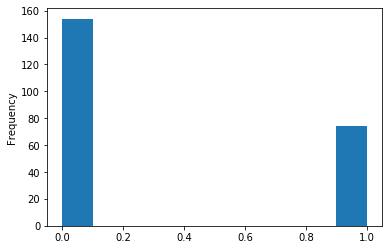

In [44]:
# plot basic histogram
exercise_angina.plot.hist()

## 利用列聯表，找到 exercise angina 跟 heart disease 答案之間的關係
## 接著利用列聯表，試圖找出此 high sugar 的特徵重不重要；與答案有沒有關係
## 方法包括：chi square / mutual information。其中 chi square test 是拿來看特徵有沒有跟答案獨立、關係；mutual information 是看特徵在答案分類中，資訊熵佔大不大

In [45]:
crosstab_exercise_angina = pd.crosstab(middle_six.exercise_angina, middle_six.heart_disease)
crosstab_exercise_angina

heart_disease,0,1
exercise_angina,,
0,102,52
1,18,56


In [46]:
# get mutal information and chi square's p value
mi_score = mutual_info_score(middle_six.exercise_angina.values, middle_six.heart_disease.values, crosstab_exercise_angina.values)
chi2_stat, p, dof, ex = stats.chi2_contingency(crosstab_exercise_angina.values)

# select significance value
alpha = 0.05

print("===Chi Square Test===\n")
print("===Chi2 Stat===")
print(chi2_stat)
print("\n===Degrees of Freedom===")
print(dof)
print("\n===P-Value===")
print(p)
print("\n===Contingency Table===")
print(ex)

# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('\nVariables are associated (reject H0)')
else:
    print('\nVariables are not associated(fail to reject H0)')

print("\n===Mutual Information's score=== \n{}".format(mi_score))


===Chi Square Test===

===Chi2 Stat===
33.55227272727272

===Degrees of Freedom===
1

===P-Value===
6.937426621743426e-09

===Contingency Table===
[[81.05263158 72.94736842]
 [38.94736842 35.05263158]]
significance=0.050, p=0.000

Variables are associated (reject H0)

===Mutual Information's score=== 
0.07977364348277668


## 根據上面列聯表，畫出 stack 的直方圖

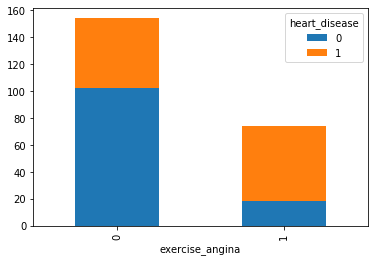

In [47]:
# plot bar chart based on contigency table
crosstab_exercise_angina.plot.bar(stacked=True)

## 這部分我們利用 exercise angina 與 heart_disease 群集起來，列出每個值的平均值
## 並利用折線圖來看趨勢走向，了解彼此關係

In [48]:
exercise_angina_groupby = middle_six.groupby(["exercise_angina", "heart_disease"]).mean()
# exercise_angina_groupby = pd.pivot_table(middle_six, index=["exercise_angina", "heart_disease"])
exercise_angina_groupby

cholestoral  high_sugar       ecg    max_rate  \
exercise_angina heart_disease                                                  
0               0               241.284314    0.156863  0.833333  159.519608   
                1               248.711538    0.115385  1.288462  145.153846   
1               0               243.222222    0.055556  1.111111  146.500000   
                1               262.482143    0.160714  1.107143  132.892857   

                               st_depression  
exercise_angina heart_disease                 
0               0                   0.543137  
                1                   1.313462  
1               0                   0.638889  
                1                   1.700000

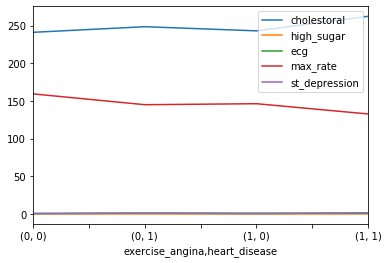

In [49]:
# 畫出折線圖
exercise_angina_groupby.plot.line()

## 處理 st depression 變數。
## 首先列出 總和、平均數，也列出四分位數。最後看看有沒有 nan 的資料 

In [50]:
# st_depression column
st_depression = middle_six.iloc[:,5]
print(st_depression, "\n")
print('陣列中的總和--------------->',st_depression.sum())
print('陣列中的平均值------------->',st_depression.mean())
print('陣列中最小值--------------->',st_depression.min())
print('陣列中第一四分位--------------->',st_depression.quantile([0.25]).values[0])
print('陣列中middle two的平均值--->',st_depression.median())
print('陣列中第三四分位--------------->',st_depression.quantile([0.75]).values[0])
print('陣列中最大值--------------->',st_depression.max())
print('陣列中的個數--------------->',st_depression.count())
print('nan 個數: {}, 值為: {}'.format(len(st_depression[st_depression.isna()]), st_depression[st_depression.isna()]))
print('unique value: {}'.format(st_depression.unique()))
st_depression

0      2.3
1      1.5
2      2.6
3      1.4
4      0.8
      ... 
223    0.0
224    1.0
225    0.2
226    1.2
227    0.0
Name: st_depression, Length: 228, dtype: float64 

陣列中的總和---------------> 230.4
陣列中的平均值-------------> 1.0105263157894737
陣列中最小值---------------> 0.0
陣列中第一四分位---------------> 0.0
陣列中middle two的平均值---> 0.8
陣列中第三四分位---------------> 1.6
陣列中最大值---------------> 6.2
陣列中的個數---------------> 228
nan 個數: 0, 值為: Series([], Name: st_depression, dtype: float64)
unique value: [2.3 1.5 2.6 1.4 0.8 0.6 3.1 0.4 1.3 0.5 1.  1.2 0.2 1.8 3.2 0.  2.5 1.6
 2.2 2.8 3.  3.6 6.2 2.  4.  5.6 2.4 2.9 0.1 2.1 1.9 4.2 0.9 1.1 3.8 0.7
 3.4 0.3 4.4]


0      2.3
1      1.5
2      2.6
3      1.4
4      0.8
      ... 
223    0.0
224    1.0
225    0.2
226    1.2
227    0.0
Name: st_depression, Length: 228, dtype: float64

## 畫出 st depression 直方圖

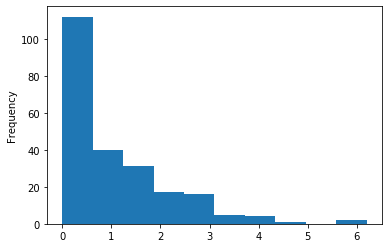

In [51]:
# plot basic histogram
st_depression.plot.hist()

## 利用列聯表，找到 st depression 跟 heart disease 答案之間的關係
## 接著利用列聯表，試圖找出此 high sugar 的特徵重不重要；與答案有沒有關係
## 方法包括：chi square / mutual information。其中 chi square test 是拿來看特徵有沒有跟答案獨立、關係；mutual information 是看特徵在答案分類中，資訊熵佔大不大

In [52]:
# 根據上面 histogram，試著找到最佳分群來當作 bin 區間
Sum_of_squared_distances = []
Sum_of_squared_thre = 0.5
current_k = 0
current_dst = 0
center = None
st_depression_val = st_depression.values
st_depression_val = st_depression_val.reshape(-1,1)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(st_depression_val)
    print(km.inertia_)
    if k == 1 :
        current_dst = km.inertia_
        current_k = k
        center = km.cluster_centers_
    else :
        if np.abs(current_dst - km.inertia_)/current_dst >= Sum_of_squared_thre :
            current_k = k
            center = km.cluster_centers_
        current_dst = km.inertia_
    Sum_of_squared_distances.append(current_dst)

final_center = []
center = center.astype(np.float64)
center = center.reshape(-1)
center = np.sort(center)
center = center.tolist()
final_center.append(st_depression_val.min())
final_center.extend(center)
final_center.append(st_depression_val.max())
current_k, final_center, len(final_center)

298.23473684210535
98.18858140632372
44.315329523809524
25.41697444803959
15.050608209438455
9.551724489795921
5.98326111983255
4.542241212614078
3.3114292696550773
2.6381272104801528
2.226750915750916
1.827581924508241
1.4729954583428264
1.2929954583428267


(3, [0.0, 0.18879999999999875, 1.5146666666666664, 3.3285714285714287, 6.2], 5)

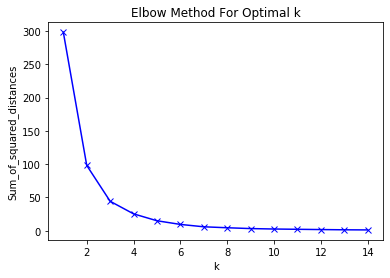

In [53]:
# plot k means result
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## 根據找到的各區間，對應每筆資料的同時，多新增一個欄位來填入這些轉換後的標籤值

In [54]:
# cut bins by k means result
bins = final_center
label_name = [str(i) for i in list(range(len(bins)-1))]
middle_six["st_depression_label"] = pd.cut(middle_six.st_depression, bins, labels=label_name, include_lowest=True)
middle_six

,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,heart_disease,cholestoral_label,max_rate_label,st_depression_label
0,233,1,2,150,0,2.3,0,1,1,2
1,286,0,2,108,1,1.5,1,1,0,1
2,229,0,2,129,1,2.6,1,1,1,2
3,204,0,2,172,0,1.4,0,0,2,1
4,236,0,0,178,0,0.8,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...
223,157,0,0,182,0,0.0,0,0,3,0
224,176,1,2,90,0,1.0,1,0,0,1
225,241,0,0,123,1,0.2,1,1,1,1
226,131,0,0,115,1,1.2,1,0,0,1


##  確認新欄位有無 nan 的值，並列出 unique value

In [55]:
st_depression_label = middle_six["st_depression_label"]
print('nan 個數: {}, 值為: {}'.format(len(st_depression_label[st_depression_label.isna()]), st_depression_label[st_depression_label.isna()]))
print('unique value: {}'.format(st_depression_label.unique()))

nan 個數: 0, 值為: Series([], Name: st_depression_label, dtype: category
Categories (4, object): [0 < 1 < 2 < 3])
unique value: [2, 1, 0, 3]
Categories (4, object): [0 < 1 < 2 < 3]


## 把新增的欄位的資料，用直方圖畫出來看看分佈

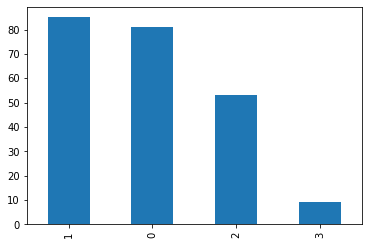

In [56]:
# plot bins from result
st_depression_label = middle_six["st_depression_label"].value_counts()
st_depression_label.plot(kind='bar')

## 利用 seaborn 畫出 boxplot，同時找到離群值
## 而這邊找離群值的方法，純粹是找資料中 0.15 與 0.85 以外（兩旁）的資料
## 同時也能找到非離群值的欄位資料

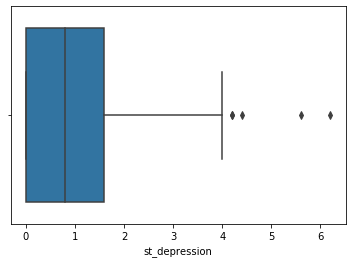

In [57]:
# find outliers and boxplot
sns.boxplot(x=st_depression)

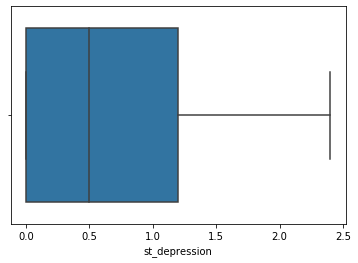

In [58]:
Q1 = st_depression.quantile(0.25)
Q3 = st_depression.quantile(0.75)
IQR = Q3 - Q1
st_depression_min_outlier = (st_depression < (Q1 - rge * IQR))
st_depression_max_outlier = (st_depression > (Q3 + rge * IQR))
outlier = st_depression_min_outlier | st_depression_max_outlier
without_outlier = ~outlier
st_depression_without_outlier = st_depression[without_outlier] # without outliers
sns.boxplot(x=st_depression_without_outlier)

In [59]:
## 移除 outliers 後，在利用直方圖來看看分佈跟畫出 boxplot

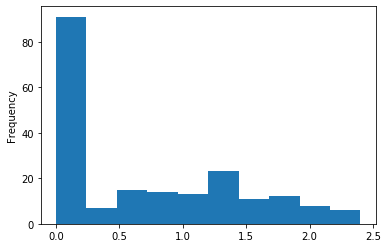

In [60]:
st_depression_without_outlier.plot.hist()

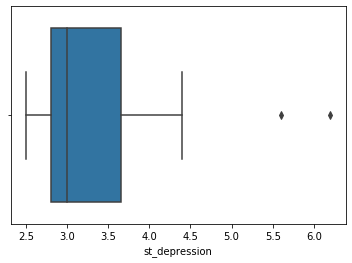

In [61]:
st_depression_with_outlier = st_depression[outlier]
sns.boxplot(x=st_depression_with_outlier)

## 找到共同都是 outlier 的欄位，與其他 outlier 的欄位。
## 移除那些共同有的 outlier，把其他 outlier 變成最大獲最小值

In [62]:
# gather all outlier and remove intersect index
cholestoral_outlier_index_max = cholestoral_with_outlier[cholestoral_max_outlier].index.values
max_rate_outlier_index_max = max_rate_with_outlier[max_rate_max_outlier].index.values
st_depression_outlier_index_max = st_depression_with_outlier[st_depression_max_outlier].index.values

cholestoral_outlier_index_min = cholestoral_with_outlier[cholestoral_min_outlier].index.values
max_rate_outlier_index_min = max_rate_with_outlier[max_rate_min_outlier].index.values
st_depression_outlier_index_min = st_depression_with_outlier[st_depression_min_outlier].index.values

cholestoral_outlier_index = np.append(cholestoral_outlier_index_max, cholestoral_outlier_index_min)
max_rate_outlier_index = np.append(max_rate_outlier_index_max, max_rate_outlier_index_min)
st_depression_outlier_index = np.append(st_depression_outlier_index_max, st_depression_outlier_index_min)
# cholestoral_outlier_index_max, max_rate_outlier_index_max, st_depression_outlier_index_max, cholestoral_outlier_index_min, max_rate_outlier_index_min, st_depression_outlier_index_min

In [63]:
# deal with outher outlier
intersect_index = reduce(np.intersect1d, (cholestoral_outlier_index, max_rate_outlier_index, st_depression_outlier_index))

# get reset min outlier cholestoral, max_rate and st_depression
middle_six.iloc[cholestoral_outlier_index_max, columns.index("cholestoral")] = cholestoral_without_outlier.min()
middle_six.iloc[max_rate_outlier_index_max, columns.index("max_rate")] = max_rate_without_outlier.min()
middle_six.iloc[st_depression_outlier_index_max, columns.index("st_depression")] = st_depression_without_outlier.min()

# get reset max outlier cholestoral, max_rate and st_depression
middle_six.iloc[cholestoral_outlier_index_min, columns.index("cholestoral")] = cholestoral_without_outlier.max()
middle_six.iloc[max_rate_outlier_index_min, columns.index("max_rate")] = max_rate_without_outlier.max()
middle_six.iloc[st_depression_outlier_index_min, columns.index("st_depression")] = st_depression_without_outlier.max()

## 重新 reset index

In [64]:
middle_six = middle_six.drop(intersect_index)
middle_six_reset_index = middle_six.reset_index().index
middle_six.index = middle_six_reset_index
middle_six

,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,heart_disease,cholestoral_label,max_rate_label,st_depression_label
0,233,1,2,150,0,2.3,0,1,1,2
1,286,0,2,185,1,1.5,1,1,0,1
2,229,0,2,129,1,0.0,1,1,1,2
3,204,0,2,172,0,1.4,0,0,2,1
4,236,0,0,178,0,0.8,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...
223,308,0,0,182,0,0.0,0,0,3,0
224,308,1,2,185,0,1.0,1,0,0,1
225,241,0,0,123,1,0.2,1,1,1,1
226,308,0,0,115,1,1.2,1,0,0,1


## 置換個欄位位置，並存成 csv 檔案
## 同時轉換資料型態

In [65]:
# move column
moved_index = [1,5,8]
cholestoral_label = middle_six["cholestoral_label"]
max_rate_label = middle_six["max_rate_label"]
st_depression_label = middle_six["st_depression_label"]

middle_six.drop(labels=["cholestoral_label", "max_rate_label", "st_depression_label"], axis=1, inplace = True)
middle_six.insert(moved_index[0], 'cholestoral_label', cholestoral_label)
middle_six.insert(moved_index[1], 'max_rate_label', max_rate_label)
middle_six.insert(moved_index[2], 'st_depression_label', st_depression_label)

# save train csv
middle_six.to_csv("data/second_part_processed_data_train.csv")

In [66]:
# new columns
new_columns = ["cholestoral_label", "high_sugar", "ecg", "max_rate_label", "exercise_angina", "st_depression_label", "heart_disease"]
new_data = middle_six[new_columns].copy()

new_data["cholestoral_label"] = new_data["cholestoral_label"].astype(int)
new_data["max_rate_label"] = new_data["max_rate_label"].astype(int)
new_data["st_depression_label"] = new_data["st_depression_label"].astype(int)

## 印出 correlation 係數，並利用 heatmap 來展現出來

In [67]:
new_data.corr()

,cholestoral_label,high_sugar,ecg,max_rate_label,exercise_angina,st_depression_label,heart_disease
cholestoral_label,1.000000,-0.022718,0.030216,0.026746,0.119958,0.069973,0.138750
high_sugar,-0.022718,1.000000,0.014756,-0.025268,-0.010409,0.005908,-0.003993
ecg,0.030216,0.014756,1.000000,-0.037121,0.057222,0.037281,0.160975
max_rate_label,0.026746,-0.025268,-0.037121,1.000000,-0.337317,-0.405364,-0.385986
exercise_angina,0.119958,-0.010409,0.057222,-0.337317,1.000000,0.263367,0.392994
st_depression_label,0.069973,0.005908,0.037281,-0.405364,0.263367,1.000000,0.384385
heart_disease,0.138750,-0.003993,0.160975,-0.385986,0.392994,0.384385,1.000000


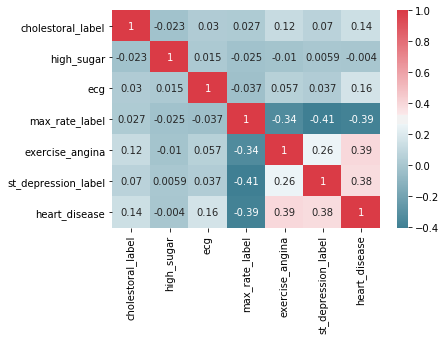

In [68]:
new_data_corr = new_data.corr()
sns.heatmap(new_data_corr, xticklabels=new_data_corr.columns, yticklabels=new_data_corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True)